In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("C://Users//Ananthram Vasu//Downloads//ICRISAT-District Level Data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [4]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# displaying columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [5]:
zero_counts = (df == 0).sum()
print("Columns with zero values:")
print(zero_counts[zero_counts > 0])

Columns with zero values:
RICE AREA (1000 ha)                     1094
RICE PRODUCTION (1000 tons)             1136
RICE YIELD (Kg per ha)                  1143
WHEAT AREA (1000 ha)                    2304
WHEAT PRODUCTION (1000 tons)            2372
                                        ... 
VEGETABLES AREA (1000 ha)               1083
FRUITS AND VEGETABLES AREA (1000 ha)    1117
POTATOES AREA (1000 ha)                 4216
ONION AREA (1000 ha)                    2207
FODDER AREA (1000 ha)                   3781
Length: 75, dtype: int64


In [6]:
#Calculate percentage of zeros in each column
zero_percentage = (df == 0).mean()

# Identify columns where 50% or more values are zero
columns_to_drop = zero_percentage[zero_percentage >= 0.5].index

# Drop those columns
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")

Dropped columns: ['RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'SAFFLOWER AREA (1000 ha)', 'SAFFLOWER PRODUCTION (1000 tons)', 'SAFFLOWER YIELD (Kg per ha)', 'CASTOR AREA (1000 ha)', 'CASTOR PRODUCTION (1000 tons)', 'CASTOR YIELD (Kg per ha)', 'LINSEED AREA (1000 ha)', 'LINSEED PRODUCTION (1000 tons)', 'LINSEED YIELD (Kg per ha)', 'SUNFLOWER AREA (1000 ha)', 'SUNFLOWER PRODUCTION (1000 tons)', 'SUNFLOWER YIELD (Kg per ha)', 'SOYABEAN AREA (1000 ha)', 'SOYABEAN PRODUCTION (1000 tons)', 'SOYABEAN YIELD (Kg per ha)', 'COTTON PRODUCTION (1000 tons)', 'COTTON YIELD (Kg per ha)']


In [7]:
df_cleaned

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE AREA (1000 ha),SUGARCANE PRODUCTION (1000 tons),SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,0.9,1.6,1777.78,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,0.8,1.2,1500.00,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1.0,1.0,1000.00,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1.0,1.9,1900.00,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,0.7,1.4,2000.00,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.0,0.0,0.00,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.0,0.0,0.00,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.0,0.0,0.00,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.0,0.0,0.00,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [8]:
df

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [9]:
#Checking the columns which contains 0 after dropping the columns
columns_with_zeros = (df_cleaned == 0).sum()
columns_with_zeros = columns_with_zeros[columns_with_zeros > 0].index  # Get column names
print(f"Columns that still contain zeros: {list(columns_with_zeros)}")

Columns that still contain zeros: ['RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)', 'CHICKPEA YIELD (Kg per ha)', 'PIGEONPEA AREA (1000 ha)', 'PIGEONPEA PRODUCTION (1000 tons)', 'PIGEONPEA YIELD (Kg per ha)', 'MINOR PULSES AREA (1000 ha)', 'MINOR PULSES PRODUCTION (1000 tons)', 'MINOR PULSES YIELD (Kg per ha)', 'GROUNDNUT AREA (1000 ha)', 'GROUNDNUT PRODUCTION (1000 tons)', 'GROUNDNUT YIELD (Kg per ha)', 'SESAMUM AREA (1000 ha)', 'SES

In [10]:
#using median imputaion filling all the remaining zeros in the columns
for col in columns_with_zeros:
    df_cleaned[col] = df_cleaned[col].replace(0, df_cleaned[col].median())  # Using median
    # Alternative: df_cleaned[col] = df_cleaned[col].replace(0, df_cleaned[col].mean())  # Using mean
df_cleaned

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE AREA (1000 ha),SUGARCANE PRODUCTION (1000 tons),SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,0.90,1.60,1777.78,0.05,5.95,6.64,12.590,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,0.80,1.20,1500.00,0.05,5.77,7.24,13.020,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1.00,1.00,1000.00,0.05,5.41,7.40,12.810,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1.00,1.90,1900.00,0.05,5.52,7.16,12.690,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,0.70,1.40,2000.00,0.05,5.45,7.19,12.640,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,1.73,7.24,4502.21,0.05,2.22,9.02,9.030,0.48,0.08,1.20
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,1.73,7.24,4502.21,0.05,2.22,8.63,8.640,0.46,0.04,1.20
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,1.73,7.24,4502.21,0.05,2.22,6.84,6.850,0.42,0.01,1.20
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,1.73,7.24,4502.21,0.05,0.03,6.40,6.430,0.03,0.01,1.20


<Axes: >

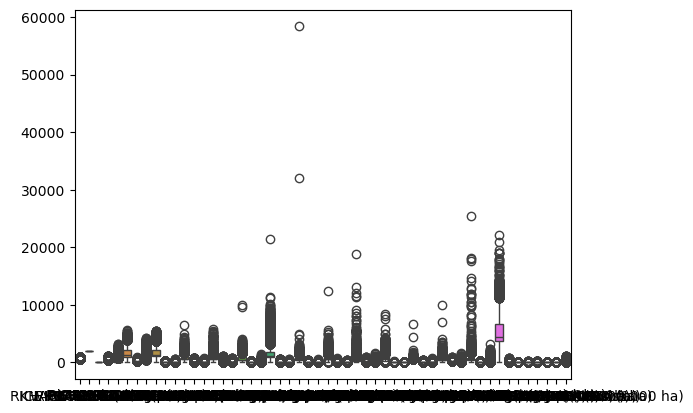

In [11]:
sns.boxplot(data=df_cleaned)

In [12]:
print(df_cleaned.columns)

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)',
       'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)',
       'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)',
       'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)',
       'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)',
       'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)',
       'CHICKPEA YIELD (Kg per ha)', 'PIGEONPEA AREA (1000 ha)',
       'PIGEONPEA PRODUCTION (1000 tons)', 'PIGEONPEA YIELD (Kg per ha)',
       'MINOR PULSES AREA (1000 ha)', 'MINOR PULSES PRODUCTION (1000 tons)',
       'MINOR PULSES YIELD 

In [13]:
# Convert '1000 ha' columns to 'ha'
area_columns = [col for col in df_cleaned.columns if 'area' in col.lower()]
df_cleaned[area_columns] = df_cleaned[area_columns] * 1000  # Convert 1000 ha → ha

# Convert '1000 tons' columns to 'tons'
production_columns = [col for col in df_cleaned.columns if 'production' in col.lower()]
df_cleaned[production_columns] = df_cleaned[production_columns] * 1000  # Convert 1000 tons → tons

# Yield is already in 'Kg per ha', so no conversion needed
print("All measurements standardized!")


All measurements standardized!


In [14]:
print(df_cleaned.describe())

          Dist Code          Year    State Code  RICE AREA (1000 ha)  \
count  16146.000000  16146.000000  16146.000000         1.614600e+04   
mean     269.769231   1991.496841      9.568562         1.331193e+05   
std      278.309125     15.011185      4.988538         1.572990e+05   
min        1.000000   1966.000000      1.000000        -1.000000e+03   
25%       78.000000   1978.000000      6.000000         1.990000e+04   
50%      156.000000   1991.000000     10.000000         6.680000e+04   
75%      241.000000   2005.000000     12.000000         1.913900e+05   
max      917.000000   2017.000000     20.000000         1.154230e+06   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
count                 1.614600e+04            16146.000000   
mean                  2.316327e+05             1581.304756   
std                   3.228851e+05              866.330799   
min                  -1.000000e+03               -1.000000   
25%                   2.280000e+04       

In [15]:
df_cleaned

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE AREA (1000 ha),SUGARCANE PRODUCTION (1000 tons),SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548000.0,185000.0,337.59,44000.0,20000.0,...,900.0,1600.0,1777.78,50.0,5950.0,6640.0,12590.0,10.0,600.0,470.0
1,1,1967,14,Chhattisgarh,Durg,547000.0,409000.0,747.71,50000.0,26000.0,...,800.0,1200.0,1500.00,50.0,5770.0,7240.0,13020.0,10.0,560.0,1230.0
2,1,1968,14,Chhattisgarh,Durg,556300.0,468000.0,841.27,53700.0,30000.0,...,1000.0,1000.0,1000.00,50.0,5410.0,7400.0,12810.0,100.0,580.0,1020.0
3,1,1969,14,Chhattisgarh,Durg,563400.0,400800.0,711.40,49400.0,26500.0,...,1000.0,1900.0,1900.00,50.0,5520.0,7160.0,12690.0,10.0,560.0,840.0
4,1,1970,14,Chhattisgarh,Durg,571600.0,473600.0,828.55,44200.0,29000.0,...,700.0,1400.0,2000.00,50.0,5450.0,7190.0,12640.0,20.0,520.0,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267060.0,579700.0,2170.67,1530.0,1850.0,...,1730.0,7240.0,4502.21,50.0,2220.0,9020.0,9030.0,480.0,80.0,1200.0
16142,917,2014,15,Jharkhand,Singhbhum,256330.0,586630.0,2288.57,5360.0,6650.0,...,1730.0,7240.0,4502.21,50.0,2220.0,8630.0,8640.0,460.0,40.0,1200.0
16143,917,2015,15,Jharkhand,Singhbhum,263210.0,264710.0,1005.70,1990.0,1820.0,...,1730.0,7240.0,4502.21,50.0,2220.0,6840.0,6850.0,420.0,10.0,1200.0
16144,917,2016,15,Jharkhand,Singhbhum,224050.0,319010.0,1423.84,380.0,830.0,...,1730.0,7240.0,4502.21,50.0,30.0,6400.0,6430.0,30.0,10.0,1200.0


<Axes: >

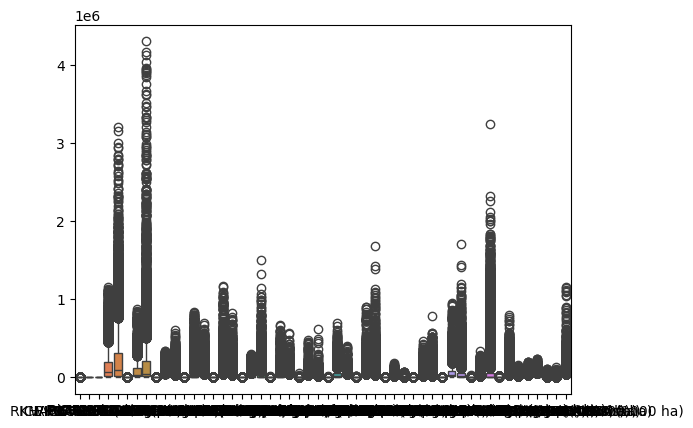

In [16]:
sns.boxplot(data=df_cleaned)

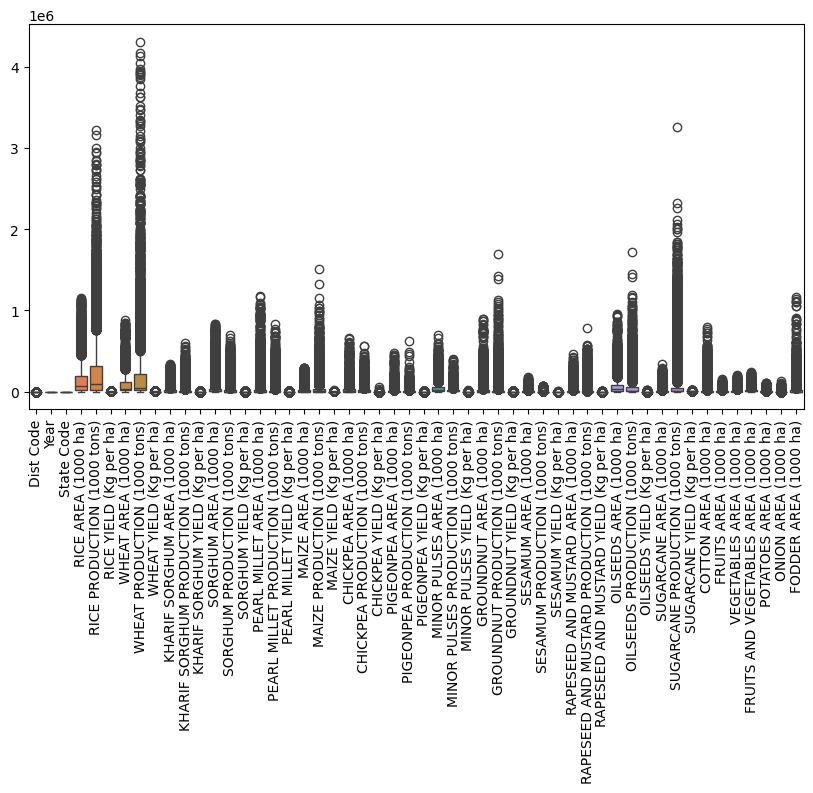

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.show()

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 54 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\2102060942.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rice_states.index, y=top_rice_states.values, palette="Blues_r")


<Figure size 1000x500 with 0 Axes>

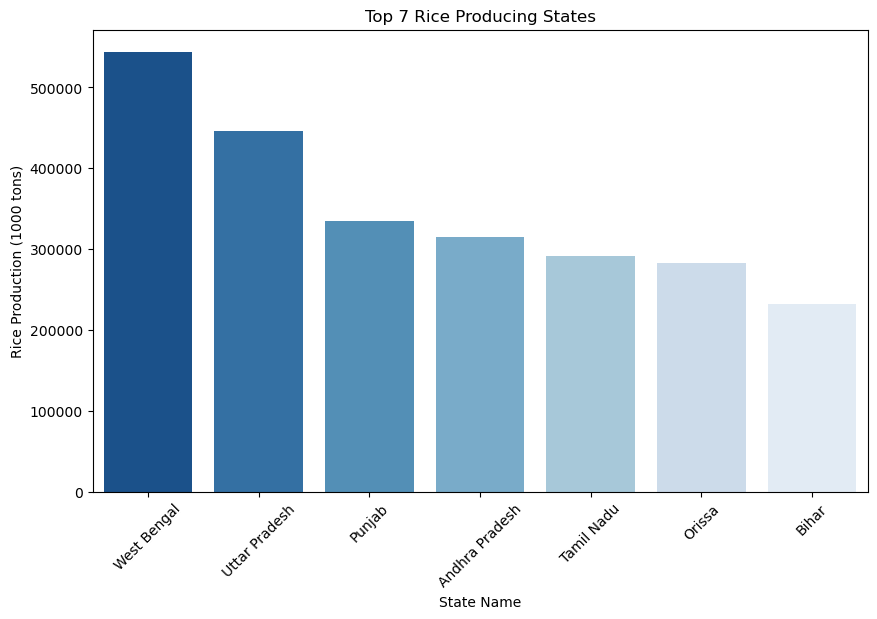

In [19]:
#Top 7 RICE PRODUCTION State Data(Bar_plot)
import matplotlib.pyplot as plt
top_rice_states = df.groupby("State Name")["RICE PRODUCTION (1000 tons)"].sum().nlargest(7)
plt.figure(figsize=(10, 5))
# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_rice_states.plot(kind="bar", color="cornflowerblue")
sns.barplot(x=top_rice_states.index, y=top_rice_states.values, palette="Blues_r")
plt.title("Top 7 Rice Producing States")
plt.xticks(rotation=45)
plt.ylabel("Rice Production (1000 tons)")
plt.show()


C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\1238054767.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wheat_states.index, y=top_wheat_states.values, palette="Oranges_r")


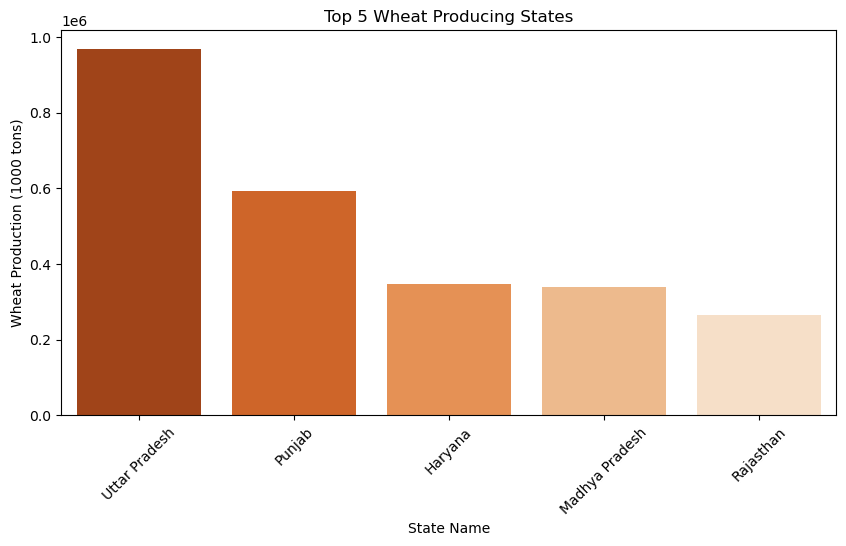

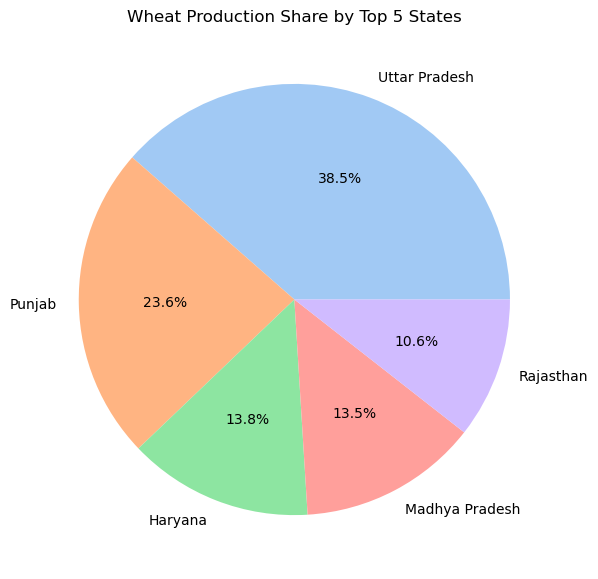

In [20]:
#Top 5 Wheat Producing States Data(Bar_chart) and its percentage(%)(Pie_chart)
top_wheat_states = df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().nlargest(5)

# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_wheat_states.index, y=top_wheat_states.values, palette="Oranges_r")
plt.title("Top 5 Wheat Producing States")
plt.ylabel("Wheat Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(top_wheat_states, labels=top_wheat_states.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Wheat Production Share by Top 5 States")
plt.show()


C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\431224572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_oilseed_states.index, y=top_oilseed_states.values, palette="Purples_r")


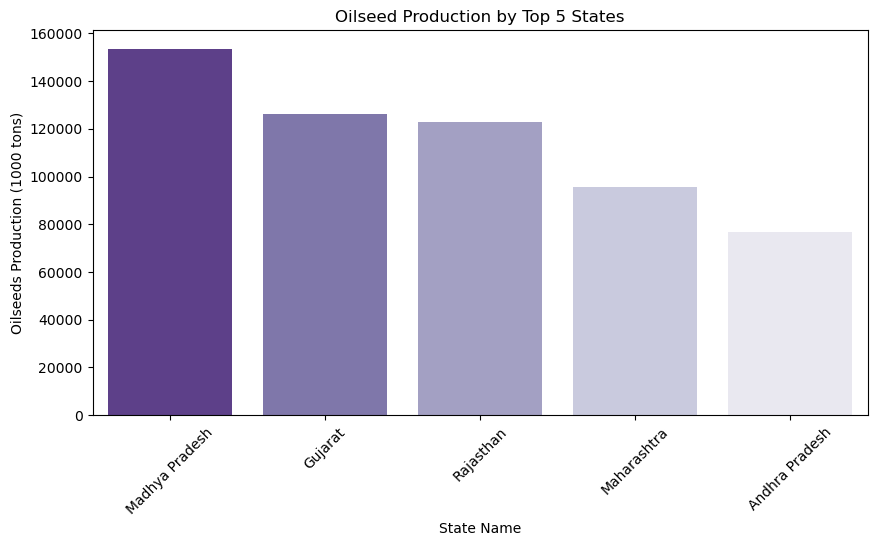

In [21]:
#Oil seed production by top 5 states
top_oilseed_states = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_oilseed_states.index, y=top_oilseed_states.values, palette="Purples_r")
plt.title("Oilseed Production by Top 5 States")
plt.ylabel("Oilseeds Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\2486476340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sunflower_states.index, y=top_sunflower_states.values, palette="YlOrBr_r")


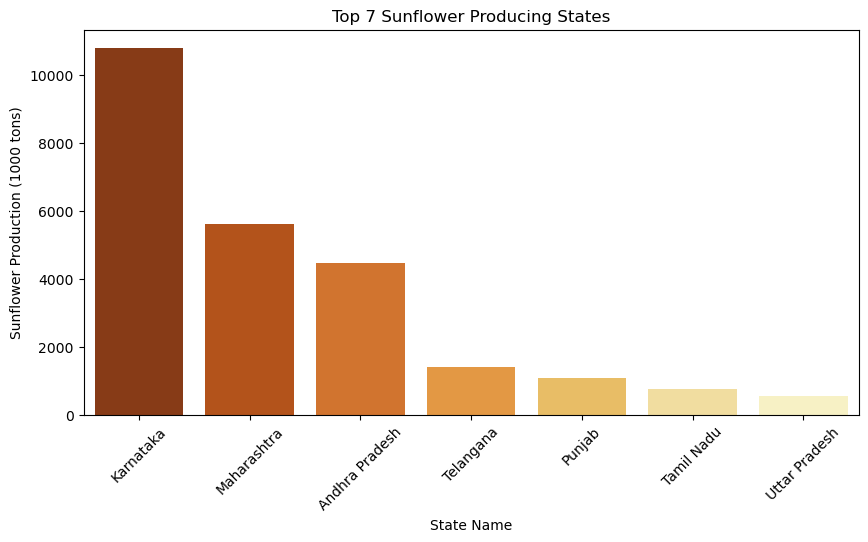

In [22]:
#Top 7 SUNFLOWER PRODUCTION  State
top_sunflower_states = df.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"].sum().nlargest(7)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sunflower_states.index, y=top_sunflower_states.values, palette="YlOrBr_r")
plt.title("Top 7 Sunflower Producing States")
plt.ylabel("Sunflower Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

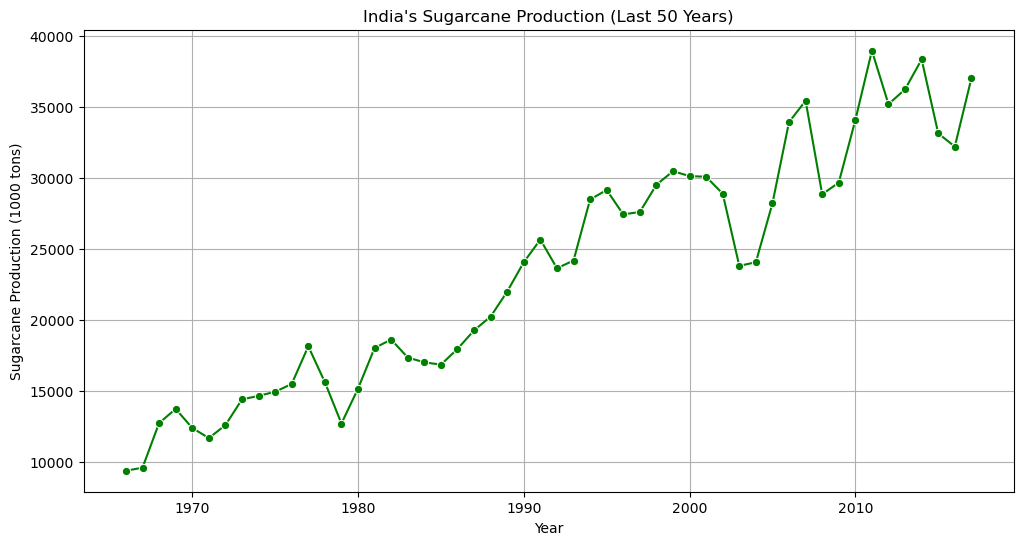

In [23]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcane_trend = df.groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sugarcane_trend.index, y=sugarcane_trend.values, marker="o", color="green")
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.ylabel("Sugarcane Production (1000 tons)")
plt.xlabel("Year")
plt.grid()
plt.show()

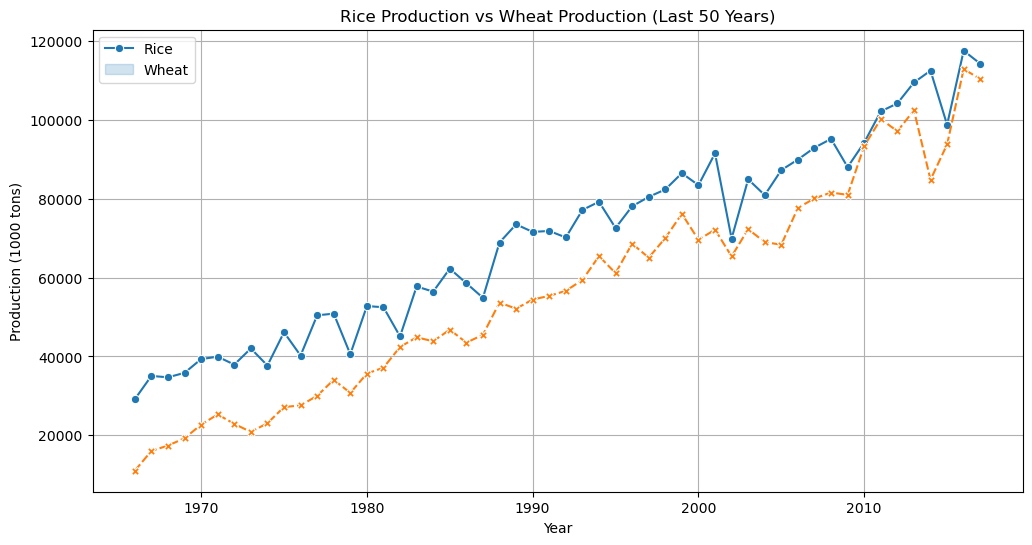

In [24]:
#Rice Production Vs Wheat Production (Last 50y)
rice_vs_wheat = df.groupby("Year")[["RICE PRODUCTION (1000 tons)", "WHEAT PRODUCTION (1000 tons)"]].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_vs_wheat, markers=True)
plt.title("Rice Production vs Wheat Production (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Year")
plt.legend(["Rice", "Wheat"])
plt.grid()
plt.show()

C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\3690305641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wb_rice.index, y=wb_rice.values, palette="Blues_r")


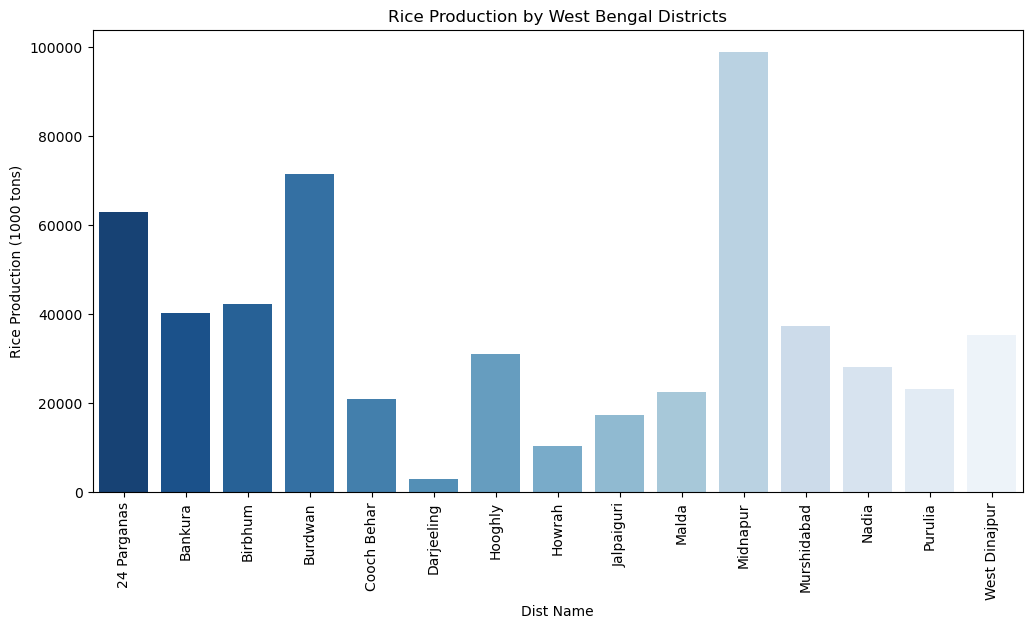

In [25]:
#Rice Production By West Bengal Districts
wb_rice = df[df["State Name"] == "West Bengal"].groupby("Dist Name")["RICE PRODUCTION (1000 tons)"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=wb_rice.index, y=wb_rice.values, palette="Blues_r")
plt.title("Rice Production by West Bengal Districts")
plt.xticks(rotation=90)
plt.ylabel("Rice Production (1000 tons)")
plt.show()

C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\3021357559.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=up_wheat.index, y=up_wheat.values, palette="Oranges_r")


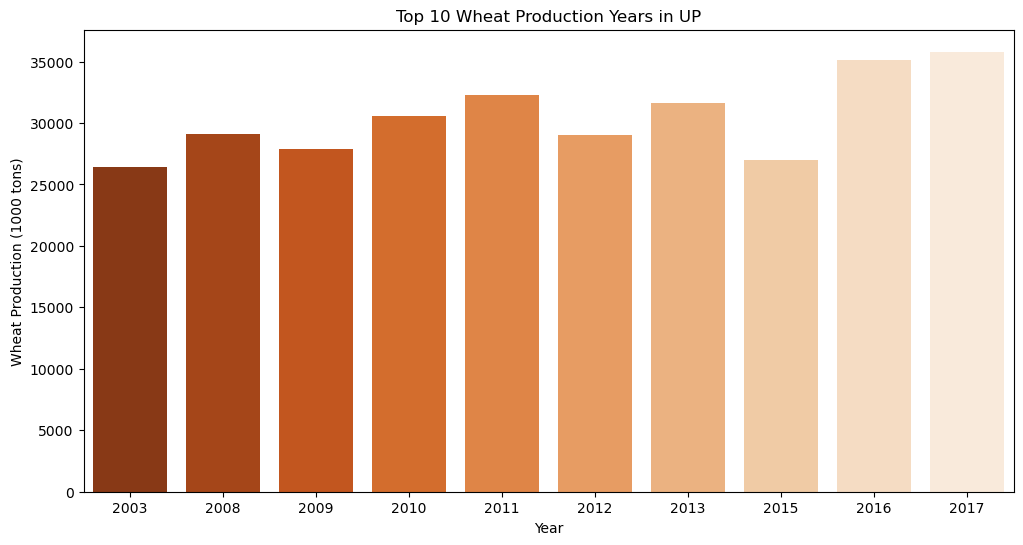

In [26]:
#Top 10 Wheat Production Years From UP
up_wheat = df[df["State Name"] == "Uttar Pradesh"].groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=up_wheat.index, y=up_wheat.values, palette="Oranges_r")
plt.title("Top 10 Wheat Production Years in UP")
plt.ylabel("Wheat Production (1000 tons)")
plt.show()

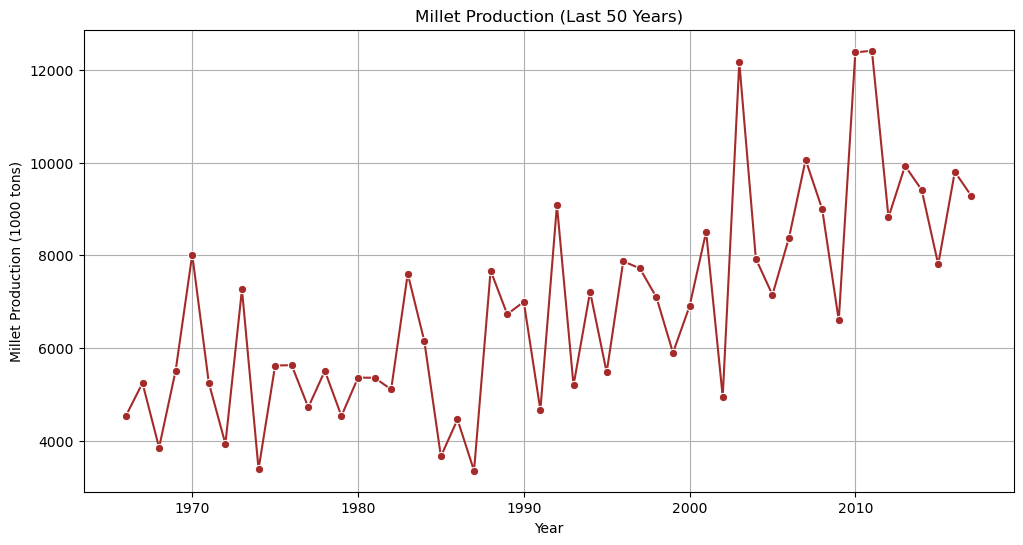

In [27]:
#Millet Production (Last 50y)
millet_trend = df.groupby("Year")["PEARL MILLET PRODUCTION (1000 tons)"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=millet_trend.index, y=millet_trend.values, marker="o", color="brown")
plt.title("Millet Production (Last 50 Years)")
plt.ylabel("Millet Production (1000 tons)")
plt.xlabel("Year")
plt.grid()
plt.show()

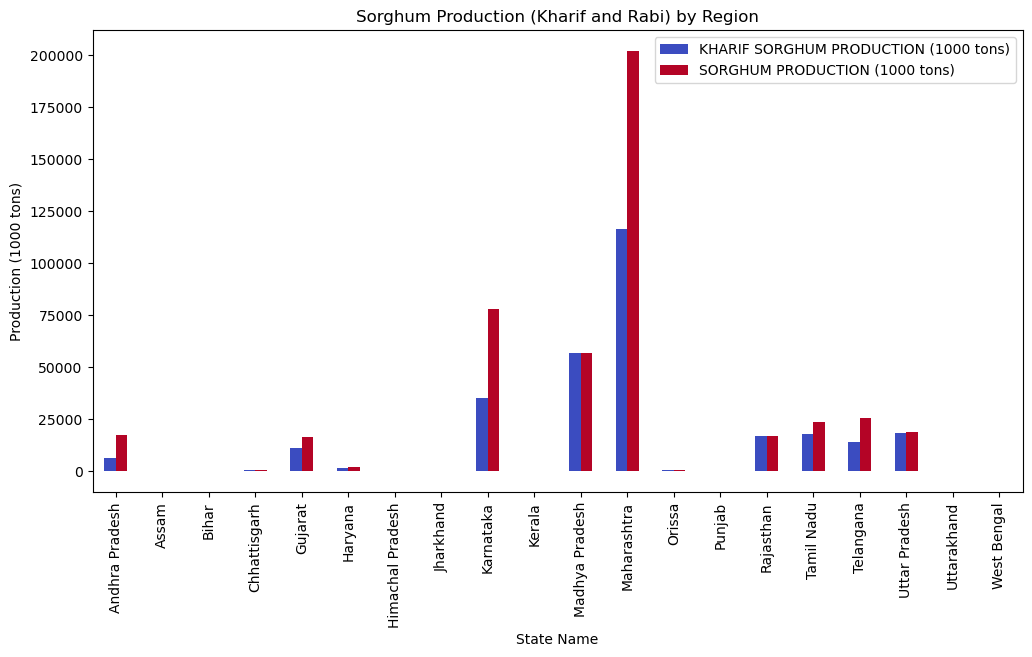

In [28]:
#Sorghum Production (Kharif and Rabi) by Region
sorghum = df.groupby("State Name")[["KHARIF SORGHUM PRODUCTION (1000 tons)", "SORGHUM PRODUCTION (1000 tons)"]].sum()
sorghum.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title("Sorghum Production (Kharif and Rabi) by Region")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=90)
plt.show()

C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\905153058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_groundnut.index, y=top_groundnut.values, palette="copper_r")


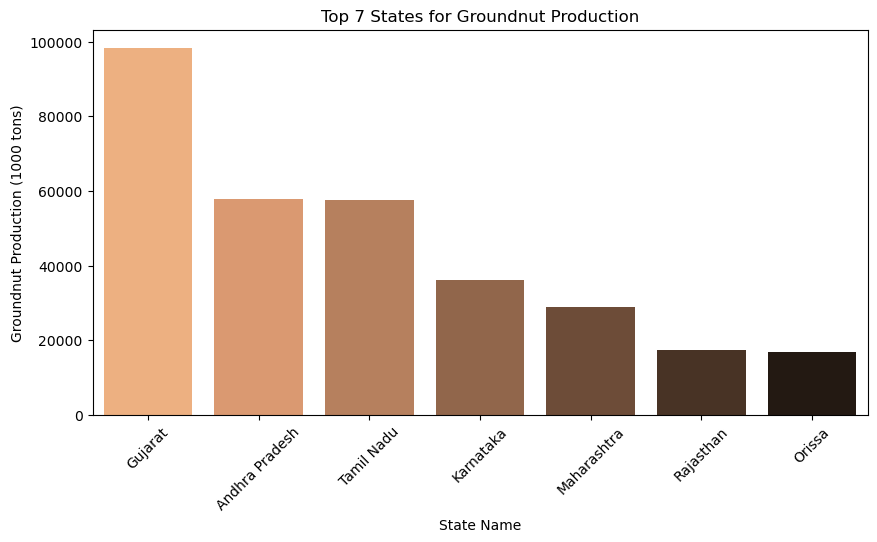

In [29]:
#Top 7 States for Groundnut Production
top_groundnut = df.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"].sum().nlargest(7)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_groundnut.index, y=top_groundnut.values, palette="copper_r")
plt.title("Top 7 States for Groundnut Production")
plt.ylabel("Groundnut Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

In [30]:
#Soybean Production by Top 5 States and Yield Efficiency
soybean = df.groupby("State Name")[["SOYBEAN PRODUCTION (1000 tons)", "SOYBEAN YIELD (Kg per ha)"]].sum().nlargest(5, "SOYBEAN PRODUCTION (1000 tons)")
soybean.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Soybean Production & Yield Efficiency by Top 5 States")
plt.ylabel("Production & Yield")
plt.xticks(rotation=45)
plt.show()

KeyError: "Columns not found: 'SOYBEAN PRODUCTION (1000 tons)', 'SOYBEAN YIELD (Kg per ha)'"

In [ ]:
#Oilseed Production in Major States

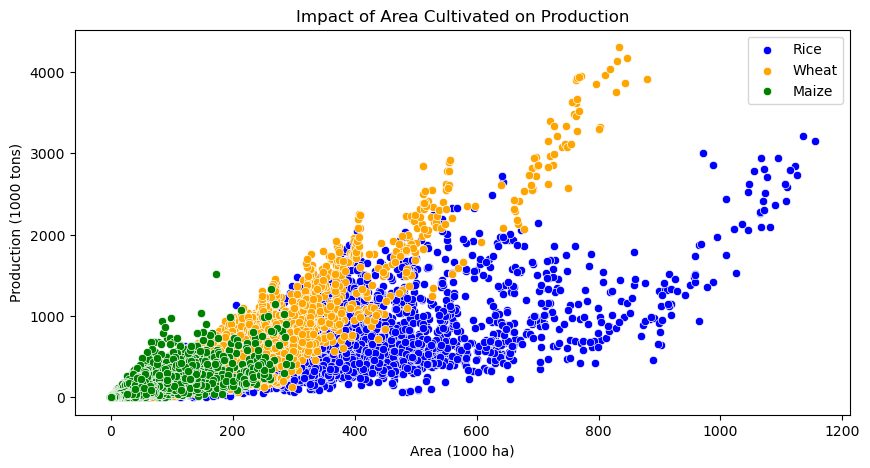

In [31]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["RICE AREA (1000 ha)"], y=df["RICE PRODUCTION (1000 tons)"], label="Rice", color="blue")
sns.scatterplot(x=df["WHEAT AREA (1000 ha)"], y=df["WHEAT PRODUCTION (1000 tons)"], label="Wheat", color="orange")
sns.scatterplot(x=df["MAIZE AREA (1000 ha)"], y=df["MAIZE PRODUCTION (1000 tons)"], label="Maize", color="green")
plt.title("Impact of Area Cultivated on Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.show()

<Figure size 1400x600 with 0 Axes>

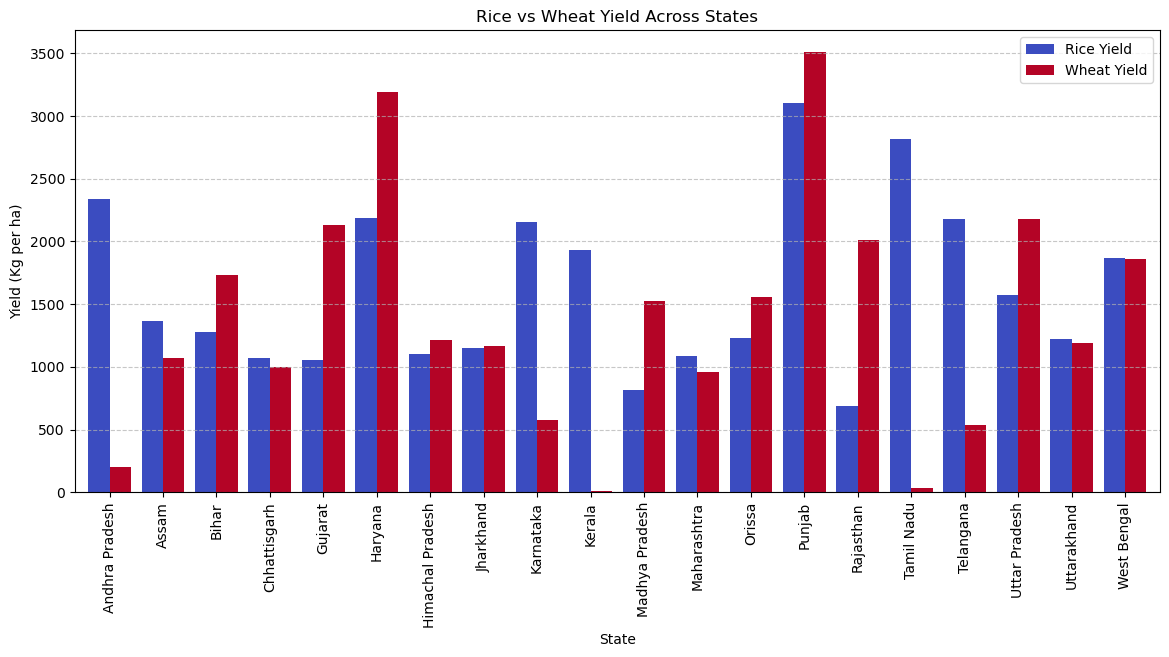

In [32]:
#Rice vs. Wheat Yield Across States
yield_comparison = df.groupby("State Name")[["RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]].mean()
plt.figure(figsize=(14, 6))
yield_comparison.plot(kind="bar", figsize=(14, 6), colormap="coolwarm", width=0.8)
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield (Kg per ha)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.legend(["Rice Yield", "Wheat Yield"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_5200\344728886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_oilseed_states.index, y=top_oilseed_states.values, palette="viridis")


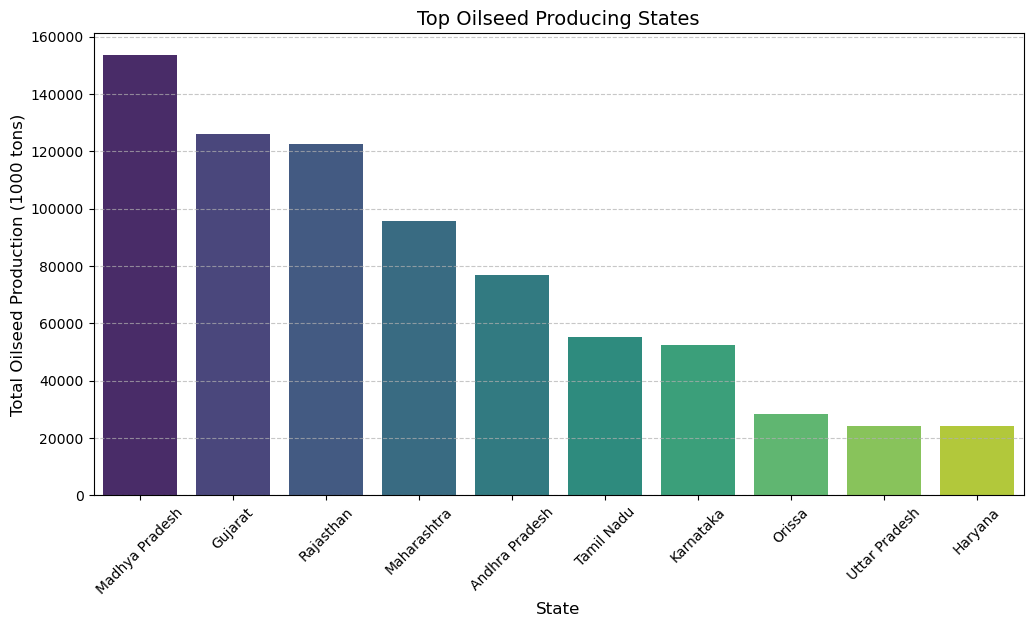

In [33]:
#Oilseed Production in Major States
oilseed_production = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum()

top_oilseed_states = oilseed_production.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_oilseed_states.index, y=top_oilseed_states.values, palette="viridis")
plt.title("Top Oilseed Producing States", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Oilseed Production (1000 tons)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


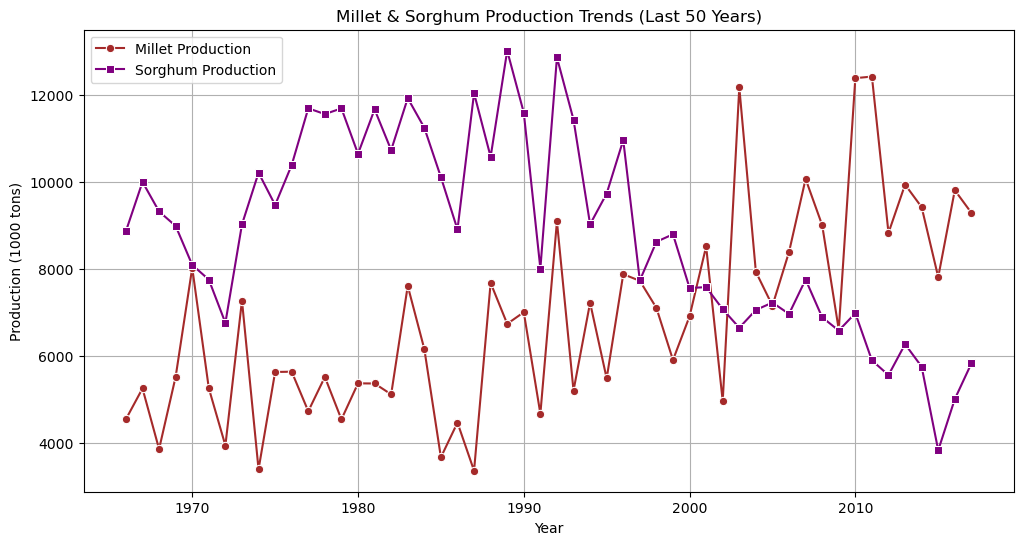

In [34]:
#Millet & Sorghum Production Trends (Last 50 Years)

# Group by year and sum up production
millet_trend = df.groupby("Year")["PEARL MILLET PRODUCTION (1000 tons)"].sum()
sorghum_trend = df.groupby("Year")["SORGHUM PRODUCTION (1000 tons)"].sum()

# Plot Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=millet_trend.index, y=millet_trend.values, label="Millet Production", marker="o", color="brown")
sns.lineplot(x=sorghum_trend.index, y=sorghum_trend.values, label="Sorghum Production", marker="s", color="purple")

plt.title("Millet & Sorghum Production Trends (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Year")
plt.legend()
plt.grid()
plt.show()


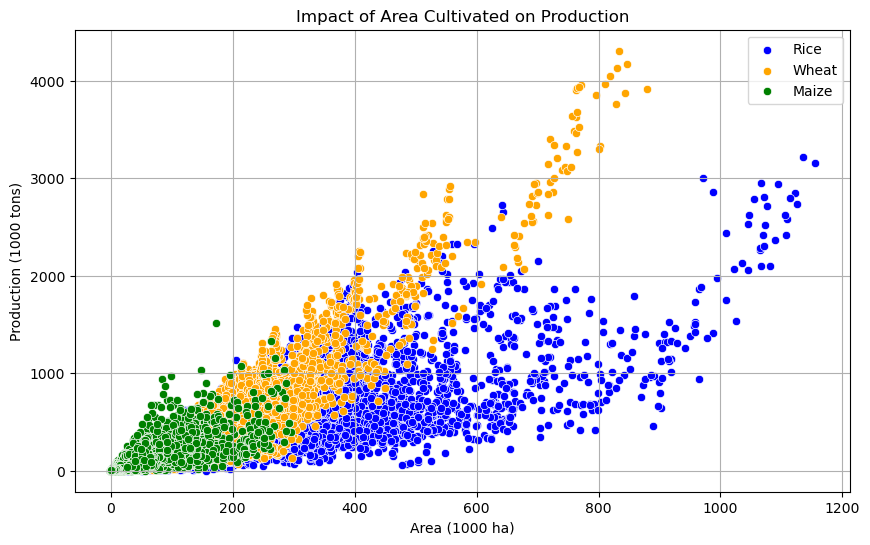

In [35]:
plt.figure(figsize=(10, 6))

# Rice
sns.scatterplot(x=df["RICE AREA (1000 ha)"], y=df["RICE PRODUCTION (1000 tons)"], label="Rice", color="blue")

# Wheat
sns.scatterplot(x=df["WHEAT AREA (1000 ha)"], y=df["WHEAT PRODUCTION (1000 tons)"], label="Wheat", color="orange")

# Maize
sns.scatterplot(x=df["MAIZE AREA (1000 ha)"], y=df["MAIZE PRODUCTION (1000 tons)"], label="Maize", color="green")

plt.title("Impact of Area Cultivated on Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.grid()
plt.show()


In [36]:
!pip install geopandas

In [41]:
pip install pandas pymysql sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [44]:
from sqlalchemy import create_engine

# 🔹 Define MySQL connection parameters
host = "127.0.0.1"
user = "root"
password = "*Varsha123$"
database_name = "guvi_project"

# 🔹 Create a connection to MySQL using SQLAlchemy
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database_name}")


# 🔹 Write DataFrame to MySQL Table (if table does not exist, it will create one)
df_cleaned.to_sql("agritables", con=engine, if_exists="replace", index=False)

print("✅ DataFrame successfully written to MySQL!")


✅ DataFrame successfully written to MySQL!


In [46]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

# MySQL Connection Details
host = "127.0.0.1"
user = "root"
password = "*Varsha123$"
database = "guvi_project"
table_name = "agritables"

# Create Engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

# Fetch current column names and data types
query = f"SELECT COLUMN_NAME, COLUMN_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name}';"
df = pd.read_sql(query, engine)

# Generate ALTER TABLE query dynamically
alter_queries = [
    f"CHANGE COLUMN `{row.COLUMN_NAME}` `{row.COLUMN_NAME.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}` {row.COLUMN_TYPE}"
    for _, row in df.iterrows()
]

# Execute Query
final_query = f"ALTER TABLE {table_name} {', '.join(alter_queries)};"
with engine.connect() as conn:
    conn.execute(final_query)

print("Column names updated successfully!")


ObjectNotExecutableError: Not an executable object: 'ALTER TABLE agritables CHANGE COLUMN `CHICKPEA AREA (1000 ha)` `CHICKPEA_AREA_1000_ha` double, CHANGE COLUMN `CHICKPEA PRODUCTION (1000 tons)` `CHICKPEA_PRODUCTION_1000_tons` double, CHANGE COLUMN `CHICKPEA YIELD (Kg per ha)` `CHICKPEA_YIELD_Kg_per_ha` double, CHANGE COLUMN `COTTON AREA (1000 ha)` `COTTON_AREA_1000_ha` double, CHANGE COLUMN `Dist Code` `Dist_Code` bigint, CHANGE COLUMN `Dist Name` `Dist_Name` text, CHANGE COLUMN `FODDER AREA (1000 ha)` `FODDER_AREA_1000_ha` double, CHANGE COLUMN `FRUITS AND VEGETABLES AREA (1000 ha)` `FRUITS_AND_VEGETABLES_AREA_1000_ha` double, CHANGE COLUMN `FRUITS AREA (1000 ha)` `FRUITS_AREA_1000_ha` double, CHANGE COLUMN `GROUNDNUT AREA (1000 ha)` `GROUNDNUT_AREA_1000_ha` double, CHANGE COLUMN `GROUNDNUT PRODUCTION (1000 tons)` `GROUNDNUT_PRODUCTION_1000_tons` double, CHANGE COLUMN `GROUNDNUT YIELD (Kg per ha)` `GROUNDNUT_YIELD_Kg_per_ha` double, CHANGE COLUMN `KHARIF SORGHUM AREA (1000 ha)` `KHARIF_SORGHUM_AREA_1000_ha` double, CHANGE COLUMN `KHARIF SORGHUM PRODUCTION (1000 tons)` `KHARIF_SORGHUM_PRODUCTION_1000_tons` double, CHANGE COLUMN `KHARIF SORGHUM YIELD (Kg per ha)` `KHARIF_SORGHUM_YIELD_Kg_per_ha` double, CHANGE COLUMN `MAIZE AREA (1000 ha)` `MAIZE_AREA_1000_ha` double, CHANGE COLUMN `MAIZE PRODUCTION (1000 tons)` `MAIZE_PRODUCTION_1000_tons` double, CHANGE COLUMN `MAIZE YIELD (Kg per ha)` `MAIZE_YIELD_Kg_per_ha` double, CHANGE COLUMN `MINOR PULSES AREA (1000 ha)` `MINOR_PULSES_AREA_1000_ha` double, CHANGE COLUMN `MINOR PULSES PRODUCTION (1000 tons)` `MINOR_PULSES_PRODUCTION_1000_tons` double, CHANGE COLUMN `MINOR PULSES YIELD (Kg per ha)` `MINOR_PULSES_YIELD_Kg_per_ha` double, CHANGE COLUMN `OILSEEDS AREA (1000 ha)` `OILSEEDS_AREA_1000_ha` double, CHANGE COLUMN `OILSEEDS PRODUCTION (1000 tons)` `OILSEEDS_PRODUCTION_1000_tons` double, CHANGE COLUMN `OILSEEDS YIELD (Kg per ha)` `OILSEEDS_YIELD_Kg_per_ha` double, CHANGE COLUMN `ONION AREA (1000 ha)` `ONION_AREA_1000_ha` double, CHANGE COLUMN `PEARL MILLET AREA (1000 ha)` `PEARL_MILLET_AREA_1000_ha` double, CHANGE COLUMN `PEARL MILLET PRODUCTION (1000 tons)` `PEARL_MILLET_PRODUCTION_1000_tons` double, CHANGE COLUMN `PEARL MILLET YIELD (Kg per ha)` `PEARL_MILLET_YIELD_Kg_per_ha` double, CHANGE COLUMN `PIGEONPEA AREA (1000 ha)` `PIGEONPEA_AREA_1000_ha` double, CHANGE COLUMN `PIGEONPEA PRODUCTION (1000 tons)` `PIGEONPEA_PRODUCTION_1000_tons` double, CHANGE COLUMN `PIGEONPEA YIELD (Kg per ha)` `PIGEONPEA_YIELD_Kg_per_ha` double, CHANGE COLUMN `POTATOES AREA (1000 ha)` `POTATOES_AREA_1000_ha` double, CHANGE COLUMN `RAPESEED AND MUSTARD AREA (1000 ha)` `RAPESEED_AND_MUSTARD_AREA_1000_ha` double, CHANGE COLUMN `RAPESEED AND MUSTARD PRODUCTION (1000 tons)` `RAPESEED_AND_MUSTARD_PRODUCTION_1000_tons` double, CHANGE COLUMN `RAPESEED AND MUSTARD YIELD (Kg per ha)` `RAPESEED_AND_MUSTARD_YIELD_Kg_per_ha` double, CHANGE COLUMN `RICE AREA (1000 ha)` `RICE_AREA_1000_ha` double, CHANGE COLUMN `RICE PRODUCTION (1000 tons)` `RICE_PRODUCTION_1000_tons` double, CHANGE COLUMN `RICE YIELD (Kg per ha)` `RICE_YIELD_Kg_per_ha` double, CHANGE COLUMN `SESAMUM AREA (1000 ha)` `SESAMUM_AREA_1000_ha` double, CHANGE COLUMN `SESAMUM PRODUCTION (1000 tons)` `SESAMUM_PRODUCTION_1000_tons` double, CHANGE COLUMN `SESAMUM YIELD (Kg per ha)` `SESAMUM_YIELD_Kg_per_ha` double, CHANGE COLUMN `SORGHUM AREA (1000 ha)` `SORGHUM_AREA_1000_ha` double, CHANGE COLUMN `SORGHUM PRODUCTION (1000 tons)` `SORGHUM_PRODUCTION_1000_tons` double, CHANGE COLUMN `SORGHUM YIELD (Kg per ha)` `SORGHUM_YIELD_Kg_per_ha` double, CHANGE COLUMN `State Code` `State_Code` bigint, CHANGE COLUMN `State Name` `State_Name` text, CHANGE COLUMN `SUGARCANE AREA (1000 ha)` `SUGARCANE_AREA_1000_ha` double, CHANGE COLUMN `SUGARCANE PRODUCTION (1000 tons)` `SUGARCANE_PRODUCTION_1000_tons` double, CHANGE COLUMN `SUGARCANE YIELD (Kg per ha)` `SUGARCANE_YIELD_Kg_per_ha` double, CHANGE COLUMN `VEGETABLES AREA (1000 ha)` `VEGETABLES_AREA_1000_ha` double, CHANGE COLUMN `WHEAT AREA (1000 ha)` `WHEAT_AREA_1000_ha` double, CHANGE COLUMN `WHEAT PRODUCTION (1000 tons)` `WHEAT_PRODUCTION_1000_tons` double, CHANGE COLUMN `WHEAT YIELD (Kg per ha)` `WHEAT_YIELD_Kg_per_ha` double, CHANGE COLUMN `Year` `Year` bigint;'